# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

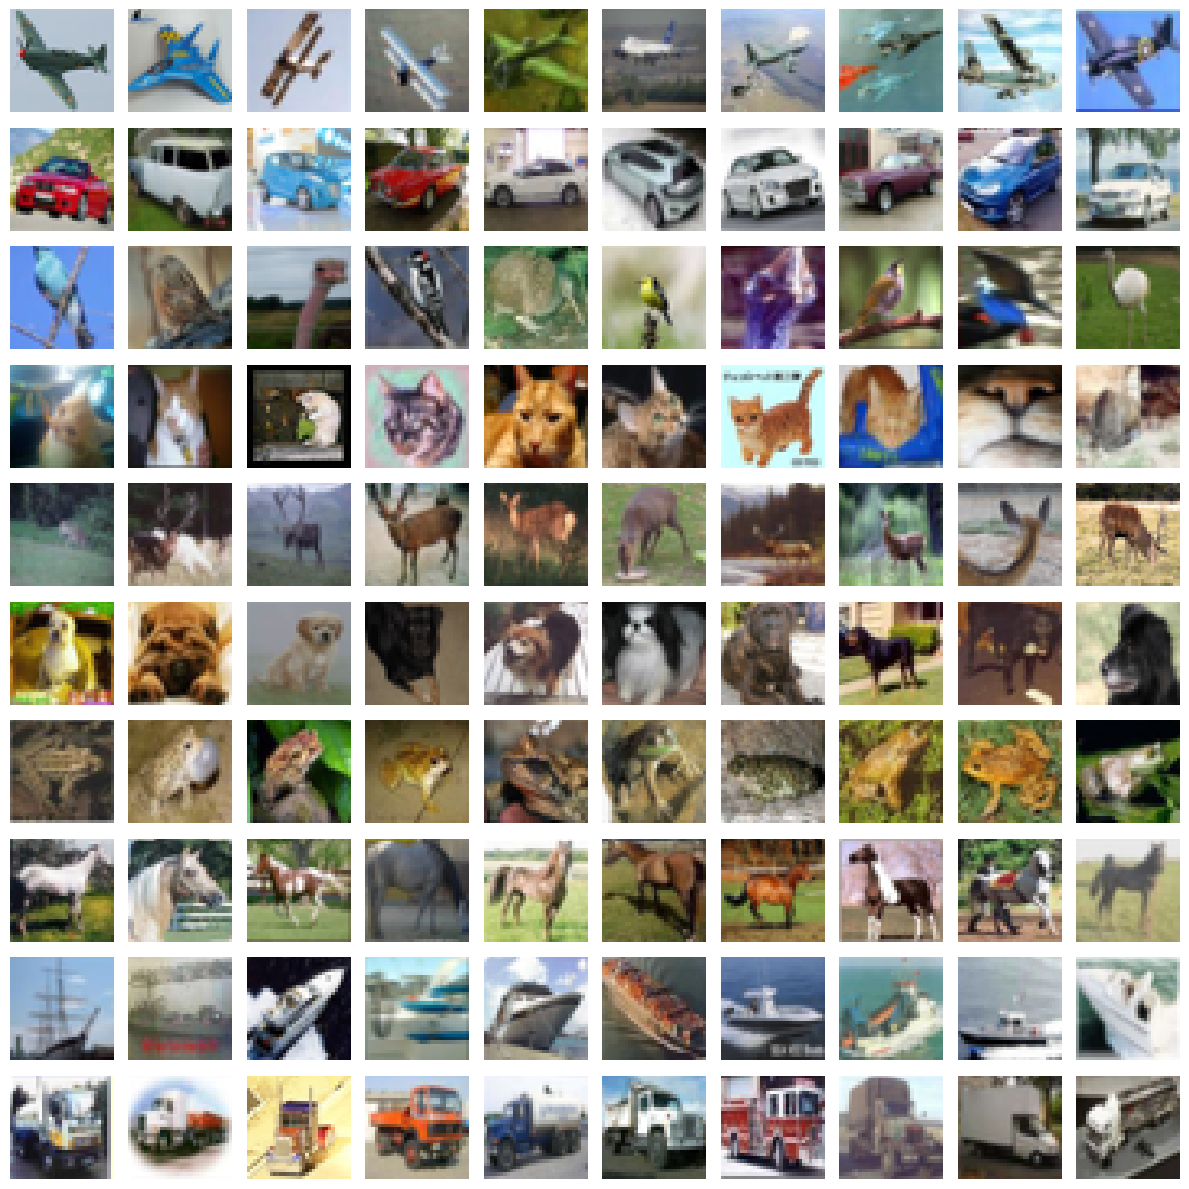

x_train shape: (50000, 32, 32, 3)
y_train shape (one-hot): (50000, 10)


In [11]:
# Your code here :


# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create 10x10 plot: 10 samples per class
def plot_10x10_samples(x, y, class_names):
    plt.figure(figsize=(12, 12))
    for class_id in range(10):
        # Get indices of images belonging to the class
        idxs = np.where(y.flatten() == class_id)[0]
        # Randomly select 10 samples
        selected = np.random.choice(idxs, 10, replace=False)

        for i, idx in enumerate(selected):
            plt_idx = class_id * 10 + i + 1
            plt.subplot(10, 10, plt_idx)
            plt.imshow(x[idx])
            plt.axis('off')
            if i == 0:
                plt.ylabel(class_names[class_id], fontsize=10)
    plt.tight_layout()
    plt.show()

plot_10x10_samples(x_train, y_train, class_names)

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Normalize the images (pixel values 0–255 → 0–1)
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Verify shapes
print("x_train shape:", x_train_normalized.shape)
print("y_train shape (one-hot):", y_train_encoded.shape)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
# Your code here :

from keras.backend import clear_session
from tensorflow.keras import layers, models

# Clear any previous model state
clear_session()

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Input layer
    
    layers.Conv2D(32, (3, 3), activation='relu'),  # Conv layer
    layers.MaxPooling2D(pool_size=(2, 2)),         # Max pooling
    
    layers.Flatten(),                              # Flatten to 1D
    layers.Dense(100, activation='relu'),          # Dense hidden layer
    layers.Dense(10, activation='softmax')         # Output layer for 10 classes
])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :

from tensorflow.keras.optimizers import SGD

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),   # You can tune learning rate if needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)


Epoch 1/50
98/98 - 60s - 615ms/step - accuracy: 0.1928 - loss: 2.2545 - val_accuracy: 0.2438 - val_loss: 2.1951
Epoch 2/50
98/98 - 76s - 777ms/step - accuracy: 0.2656 - loss: 2.1248 - val_accuracy: 0.2764 - val_loss: 2.0582
Epoch 3/50
98/98 - 53s - 541ms/step - accuracy: 0.3039 - loss: 2.0052 - val_accuracy: 0.3123 - val_loss: 1.9735
Epoch 4/50
98/98 - 96s - 978ms/step - accuracy: 0.3293 - loss: 1.9298 - val_accuracy: 0.3361 - val_loss: 1.9023
Epoch 5/50
98/98 - 94s - 962ms/step - accuracy: 0.3461 - loss: 1.8789 - val_accuracy: 0.3470 - val_loss: 1.8659
Epoch 6/50
98/98 - 76s - 780ms/step - accuracy: 0.3609 - loss: 1.8400 - val_accuracy: 0.3574 - val_loss: 1.8311
Epoch 7/50
98/98 - 62s - 630ms/step - accuracy: 0.3717 - loss: 1.8091 - val_accuracy: 0.3761 - val_loss: 1.7913
Epoch 8/50
98/98 - 63s - 643ms/step - accuracy: 0.3823 - loss: 1.7774 - val_accuracy: 0.3741 - val_loss: 1.7747
Epoch 9/50
98/98 - 54s - 556ms/step - accuracy: 0.3932 - loss: 1.7485 - val_accuracy: 0.3955 - val_loss:

*   Plot the cross entropy loss curve and the accuracy curve

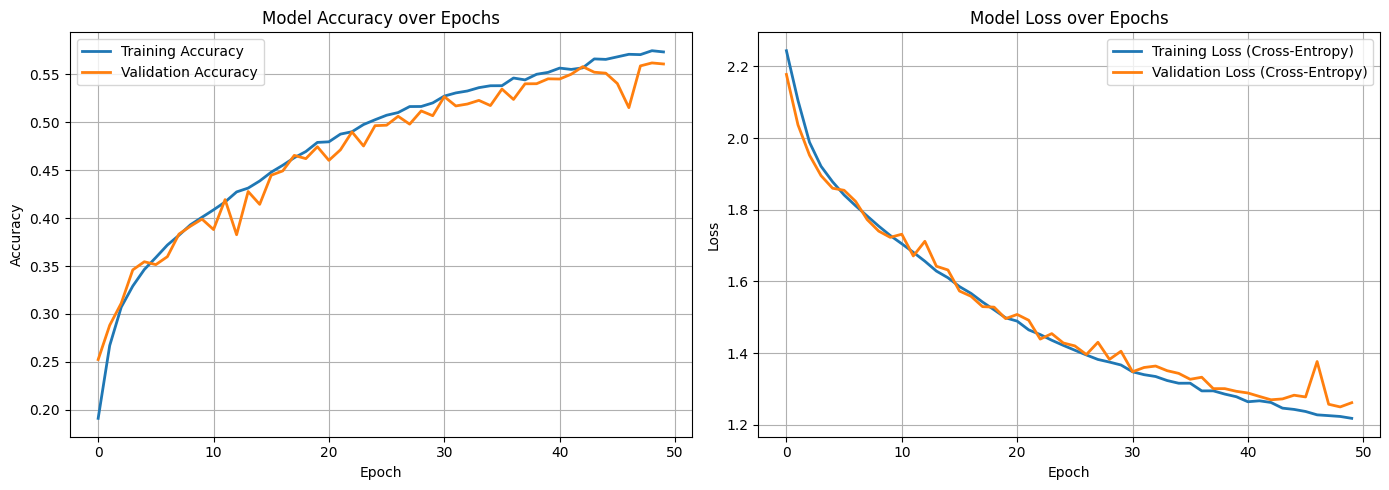

In [ ]:
# Your code here :

import matplotlib.pyplot as plt

# Create side-by-side plots for Accuracy and Loss
plt.figure(figsize=(14, 5))

# === Accuracy Curve ===
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# === Loss Curve ===
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss (Cross-Entropy)', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss (Cross-Entropy)', linewidth=2)
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/

In [ ]:
# Your code here :

from keras.backend import clear_session
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

# Reset session
clear_session()

# Define the VGG-like deeper CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # VGG-style block
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model
history = model.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'x_train_normalized' is not defined

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :

from tensorflow.keras.optimizers import SGD

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)


NameError: name 'x_train_normalized' is not defined

NameError: name 'history' is not defined

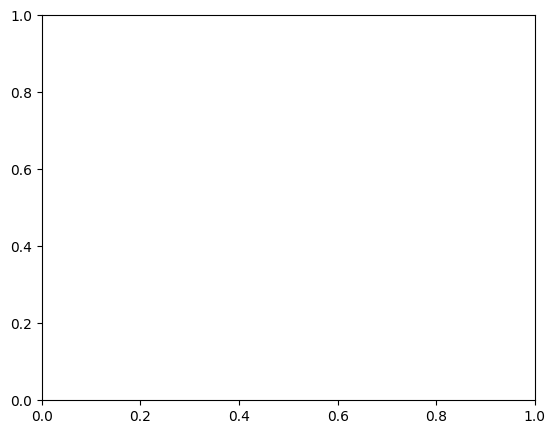

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

In [ ]:
# Your code here :

history1 = history  # for the first (simple) model

# after training the second model:
history2 = history  # for the VGG-style model


NameError: name 'history' is not defined

NameError: name 'history1' is not defined

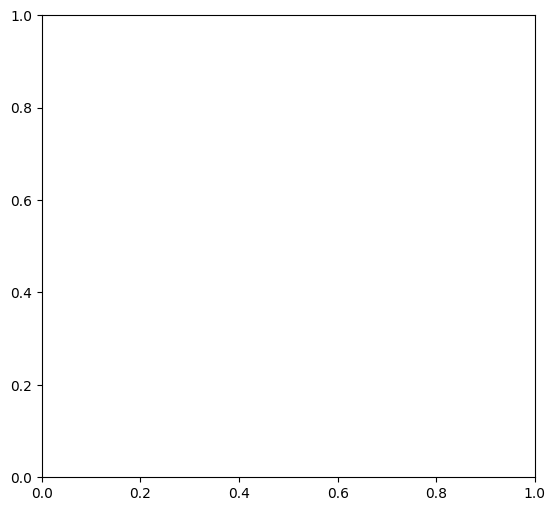

In [ ]:
import matplotlib.pyplot as plt

# Plot comparison: Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Simple Model - Train', linestyle='--')
plt.plot(history1.history['val_accuracy'], label='Simple Model - Val', linestyle='--')
plt.plot(history2.history['accuracy'], label='VGG Model - Train', linewidth=2)
plt.plot(history2.history['val_accuracy'], label='VGG Model - Val', linewidth=2)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot comparison: Loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Simple Model - Train', linestyle='--')
plt.plot(history1.history['val_loss'], label='Simple Model - Val', linestyle='--')
plt.plot(history2.history['loss'], label='VGG Model - Train', linewidth=2)
plt.plot(history2.history['val_loss'], label='VGG Model - Val', linewidth=2)
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Comment on the observation**

comment comes after running is complete to compare...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Your code here :

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict on test data
y_test_pred_probs = model.predict(x_test_normalized, verbose=0)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)

# Step 2: True class labels
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

# Step 3: Confusion matrix
cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Improved Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Step 5: Classification Report
print("Classification Report:\n")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=class_names))


NameError: name 'x_test_normalized' is not defined

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# Your code here :

# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_encoded, verbose=2)

# Print test accuracy
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


NameError: name 'x_test_normalized' is not defined

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

from keras.backend import clear_session
from tensorflow.keras import layers, models

# Reset session
clear_session()

# Define full VGG-style CNN model
model = models.Sequential([
    # Input Layer
    layers.Input(shape=(64, 64, 3)),

    # Block 1: 2 × Conv(64) + MaxPool
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 2: 2 × Conv(128) + MaxPool
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 3: 2 × Conv(256) + MaxPool
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Display summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Resize train and test images
x_train_resized = tf.image.resize(x_train, [64, 64]).numpy()
x_test_resized = tf.image.resize(x_test, [64, 64]).numpy()

# Normalize (again, just to be sure)
x_train_resized = x_train_resized.astype('float32') / 255.0
x_test_resized = x_test_resized.astype('float32') / 255.0


NameError: name 'x_train' is not defined

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_resized, y_train_encoded,
          epochs=50,
          batch_size=512,
          validation_data=(x_test_resized, y_test_encoded),
          verbose=2)


NameError: name 'x_train_resized' is not defined

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :

from tensorflow.keras.optimizers import SGD

# === Compile the model ===
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Train the model with data augmentation ===
history = model.fit(
    datagen.flow(x_train_resized, y_train_encoded, batch_size=512),
    epochs=10,
    validation_data=(x_test_resized, y_test_encoded),
    verbose=2
)


NameError: name 'datagen' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Predict on test set ===
y_test_pred_probs = model.predict(x_test_resized, verbose=0)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

# === Compute confusion matrix ===
cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# === Plot confusion matrix ===
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: VGG with Dropout + BatchNorm + Augmentation")
plt.tight_layout()
plt.show()

# === Optional: Print classification report ===
print("\nClassification Report:\n")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=class_names))


NameError: name 'x_test_resized' is not defined

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into the neural network. Without them, no matter how many layers we stack, the entire model behaves like a linear function, which limits its ability to learn complex patterns.

They are used to:

    Allow the network to model non-linear relationships.

    Control the output range of neurons (e.g., between 0 and 1, or -1 and 1).

    Enable the network to learn hierarchical features, like edges, shapes, objects.

    

2 - Key Differences between sigmoid and softmax:

| Feature          |           Sigmoid                          | Softmax                                           |
| ---------------- | ------------------------------------- | ------------------------------------------------------ |
|      Use Case    | Binary classification                 | Multi-class classification                             |
|     Output       | Scalar between 0 and 1                | Vector of probabilities that sum to 1                  |
|      Formula     | $\sigma(x) = \frac{1}{1 + e^{-x}}$    | $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$ |
|     Independence |      Each output is independent       | Outputs are interdependent                             |
|      Example     |     Used for binary/multi-label tasks | Used for single-label multi-class tasks                |



3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Use binary crossentropy when each class is independent (e.g., multi-label), while categorical crossentropy is used when there is only one correct class per sample.